This script loads the Nonemployer Statistics (NES) data from 2000 - 2020 from https://www.census.gov/programs-surveys/nonemployer-statistics/data/datasets.html

NES includes the number of businesses (with no paid employees) and total receipts by county and NAICS code. 

We are specifically interested in NAICS code 4853 for Taxi and Limousine Service (https://www.bls.gov/iag/tgs/iag485.htm)

NES Documentation: https://www.census.gov/programs-surveys/nonemployer-statistics/technical-documentation/methodology.html

In [2]:
import pandas as pd
import os
import sys
from datetime import datetime
import yaml
import time
import requests
import urllib
import zipfile
import pprint
from tqdm import tqdm
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
#from platforms.connect.snowpy import SnowPy

Suppression is indicated by a "D" or "S" in the ESTAB_F or RCPTOT_F

Establishment Flag

                                  " " - Number of establishments shown.
                                  "D" - Number of establishments 
                                        withheld to avoid disclosing 
                                        data for individual businesses; 
                                        data are included in broader 
                                        industry totals.
                                  "S" - Number of establishments 
                                        withheld to avoid disclosing 
                                        data that do not meet publication 
                                        standards; data are included in 
                                        broader industry totals.
                                        
Receipts Flag

                                " " - Receipts data are shown.
                                "D" - Receipts data are withheld to 
                                      avoid disclosing data for 
                                      individual businesses; 
                                      data are included in broader 
                                      industry totals.
                                "S" - Receipts data are withheld to 
                                      avoid disclosing data that do 
                                      not meet publication standards; 
                                      data are included in broader 
                                      industry totals.

### ETL 

In [3]:
print(os.getcwd())
datapath = os.getcwd() + '/nes_zips/'
#datapath = 'vol-1/NES_CPB_files/'

C:\Users\hrowe\Documents\FHWA mobility trend report\T4 - Forecasting\Year 2\modeling code\etl\NES


In [3]:
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)
        
def download_url(url, output_path):
    with DownloadProgressBar(unit='B', unit_scale=True,
                             miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=output_path, reporthook=t.update_to)

def try_download(url, file):
    #makedir_if_needed(datapath)
    try:
        download_url(url, file)
        print(f"Downloaded {url} to {file}")
    except urllib.error.HTTPError as e:
        print(f"Couldn't find {url}, Exception: {e}")
        
def uncompress(filepath):
    # Uncompress if zip file
    if filepath[-4:].lower() == '.zip':
        zipfolder = filepath.split('/')[-1].split('.')[0]
        print(f'                Uncompressing zip file to folder {zipfolder}')
        with zipfile.ZipFile(filepath, 'r') as zip_ref:
            zip_ref.extractall(datapath + zipfolder)
            
            
#example url https://www2.census.gov/programs-surveys/nonemployer-statistics/datasets/2019/historical-datasets/combine19_txt.zip
#            https://www2.census.gov/programs-surveys/nonemployer-statistics/datasets/2016/combine16_txt.zip
#            https://www2.census.gov/programs-surveys/nonemployer-statistics/datasets/2012/historical-datasets/combine12_txt.zip
#            https://www2.census.gov/programs-surveys/nonemployer-statistics/datasets/2020/historical-datasets/nonemp20co.zip


In [5]:
def download_nes_county_files():
    for year in range(2000,2021):
        print(year)
        url = 'https://www2.census.gov/programs-surveys/nonemployer-statistics/datasets/' + str(year) + '/historical-datasets/nonemp' + str(year)[2:] + 'co.zip'
        file_name = 'NES_County_' + str(year) + '.zip'
        download_url(url, datapath + file_name)
        uncompress(datapath + file_name)
        os.remove(datapath + file_name)
    

In [6]:
download_nes_county_files()

2000


nonemp00co.zip: 2.97MB [00:01, 2.37MB/s]


                Uncompressing zip file to folder NES_County_2000
2001


nonemp01co.zip: 2.94MB [00:01, 1.94MB/s]


                Uncompressing zip file to folder NES_County_2001
2002


nonemp02co.zip: 2.88MB [00:00, 3.42MB/s]


                Uncompressing zip file to folder NES_County_2002
2003


nonemp03co.zip: 2.93MB [00:01, 2.39MB/s]


                Uncompressing zip file to folder NES_County_2003
2004


nonemp04co.zip: 3.69MB [00:01, 3.24MB/s]


                Uncompressing zip file to folder NES_County_2004
2005


nonemp05co.zip: 4.64MB [00:01, 3.26MB/s]


                Uncompressing zip file to folder NES_County_2005
2006


nonemp06co.zip: 4.70MB [00:01, 3.39MB/s]


                Uncompressing zip file to folder NES_County_2006
2007


nonemp07co.zip: 4.86MB [00:01, 2.57MB/s]


                Uncompressing zip file to folder NES_County_2007
2008


nonemp08co.zip: 4.77MB [00:02, 2.37MB/s]


                Uncompressing zip file to folder NES_County_2008
2009


nonemp09co.zip: 4.73MB [00:01, 2.66MB/s]


                Uncompressing zip file to folder NES_County_2009
2010


nonemp10co.zip: 4.72MB [00:01, 3.47MB/s]


                Uncompressing zip file to folder NES_County_2010
2011


nonemp11co.zip: 4.73MB [00:01, 2.92MB/s]


                Uncompressing zip file to folder NES_County_2011
2012


nonemp12co.zip: 4.10MB [00:01, 3.10MB/s]


                Uncompressing zip file to folder NES_County_2012
2013


nonemp13co.zip: 4.07MB [00:01, 2.87MB/s]


                Uncompressing zip file to folder NES_County_2013
2014


nonemp14co.zip: 4.10MB [00:01, 3.24MB/s]


                Uncompressing zip file to folder NES_County_2014
2015


nonemp15co.zip: 4.33MB [00:01, 3.51MB/s]


                Uncompressing zip file to folder NES_County_2015
2016


nonemp16co.zip: 4.32MB [00:01, 3.03MB/s]


                Uncompressing zip file to folder NES_County_2016
2017


nonemp17co.zip: 4.34MB [00:01, 2.92MB/s]


                Uncompressing zip file to folder NES_County_2017
2018


nonemp18co.zip: 3.58MB [00:02, 1.59MB/s]


                Uncompressing zip file to folder NES_County_2018
2019


nonemp19co.zip: 3.54MB [00:01, 2.64MB/s]


                Uncompressing zip file to folder NES_County_2019
2020


nonemp20co.zip: 3.52MB [00:01, 3.28MB/s]

                Uncompressing zip file to folder NES_County_2020


In [4]:
datapath

'C:\\Users\\hrowe\\Documents\\FHWA mobility trend report\\T4 - Forecasting\\Year 2\\modeling code\\etl\\NES/nes_zips/'

In [5]:
year = 2000
df_2000_test = pd.read_csv(datapath + 'NES_County_' + str(year) + '/Nonemp' + str(year)[2:] + 'co.txt', 
                    dtype = str)

In [6]:
df_2000_test[df_2000_test['NAICS'] == '492']

,ST,COUNTY,NAICS,ESTAB_F,ESTAB,RCPTOT_F,RCPTOT
161,01,001,492,D,0,D,0
544,01,003,492,NaN,49,NaN,849
1168,01,007,492,D,0,D,0
1464,01,009,492,D,0,D,0
1734,01,011,492,D,0,D,0
...,...,...,...,...,...,...,...
942964,56,037,492,D,0,D,0
943313,56,039,492,D,0,D,0
943646,56,041,492,D,0,D,0
943911,56,043,492,D,0,D,0


In [7]:
#function that takes the year and naics code a returns a df from NES
def make_nes_df(year, naics):
    year = year
    df = pd.read_csv(datapath + 'NES_County_' + str(year) + '/Nonemp' + str(year)[2:] + 'co.txt', 
                    dtype = str)
    df.columns = df.columns.str.upper()       #make sure all columns are capitalized, in 2008 - 2016 caloumns come in lowercase 
    df = df[df['NAICS'] == str(naics)]        #filter to only the naics code you want
    df['YEAR'] = year                         #add a column for the year
    
    if(year < 2002):
        #df['FULL_FIPS'] = df['ST'].astype(str) + df['COUNTY'].astype(str) 
        df = df.rename(columns = {'COUNTY' : 'CTY'})    #in 2000 and 2001 the column was named 'COUNTY', in all other years it is 'CTY'
 
    df['FULL_FIPS'] = df['ST'].astype(str) + df['CTY'].astype(str)    #create a combined full fips column 
    return(df)
    

### Creating df for NAICS 4853 (Taxi and Limousine Service)

Creating df for 2000 to 2020 for Taxi and Limousine Service: NAICS 4853

In [8]:
df_2000 = make_nes_df(2000, 4853)
df_2001 = make_nes_df(2001, 4853)
df_2002 = make_nes_df(2002, 4853)
df_2003 = make_nes_df(2003, 4853)
df_2004 = make_nes_df(2004, 4853)
df_2005 = make_nes_df(2005, 4853)
df_2006 = make_nes_df(2006, 4853)
df_2007 = make_nes_df(2007, 4853)
df_2008 = make_nes_df(2008, 4853)
df_2009 = make_nes_df(2009, 4853)
df_2010 = make_nes_df(2010, 4853)
df_2011 = make_nes_df(2011, 4853)
df_2012 = make_nes_df(2012, 4853)
df_2013 = make_nes_df(2013, 4853)
df_2014 = make_nes_df(2014, 4853)
df_2015 = make_nes_df(2015, 4853)
df_2016 = make_nes_df(2016, 4853)
df_2017 = make_nes_df(2017, 4853)
df_2018 = make_nes_df(2018, 4853)
df_2019 = make_nes_df(2019, 4853)
df_2020 = make_nes_df(2020, 4853)

In [59]:
#year = 2010
#df_2010 = pd.read_csv(datapath + 'NES_County_' + str(year) + '/Nonemp' + str(year)[2:] + 'co.txt', 
                    #dtype = str)

In [9]:
pdList = [df_2000, df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020]  # List of dataframes
df_merged = pd.concat(pdList)

In [21]:
df_merged.ESTAB_F.unique()

array(['D', nan, 'S'], dtype=object)

In [22]:
df_merged.RCPTOT_F.unique()

array(['D', nan, 'S'], dtype=object)

2852 counties with suppression for NAICS 4853 establishment counts & same for receipt totals 

20166 total observations of supression for both NAICS 4853 establishment counts & receipt totals 

In [20]:
len(df_merged[(df_merged['ESTAB_F'] == 'D') | (df_merged['ESTAB_F'] == 'S')].FULL_FIPS.unique())

2852

In [23]:
len(df_merged[(df_merged['RCPTOT_F'] == 'D') | (df_merged['RCPTOT_F'] == 'S')].FULL_FIPS.unique())

2852

In [25]:
len(df_merged[(df_merged['ESTAB_F'] == 'D') | (df_merged['ESTAB_F'] == 'S')])

20166

In [24]:
len(df_merged[(df_merged['RCPTOT_F'] == 'D') | (df_merged['RCPTOT_F'] == 'S')])

20166

2000-2004 and 2008-2014 have the most casses of suppression

In [26]:
df_merged[(df_merged['ESTAB_F'] == 'D') | (df_merged['ESTAB_F'] == 'S')].groupby('YEAR').size()

YEAR
2000    1488
2001    1525
2002    1774
2003    1712
2004    1679
2005     802
2006     798
2007     929
2008    1042
2009    1021
2010    1033
2011    1057
2012    1079
2013    1060
2014    1037
2015     748
2016     678
2017     615
2018      29
2019      24
2020      36
dtype: int64

In [27]:
df_merged[(df_merged['RCPTOT_F'] == 'D') | (df_merged['RCPTOT_F'] == 'S')].groupby('YEAR').size()

YEAR
2000    1488
2001    1525
2002    1774
2003    1712
2004    1679
2005     802
2006     798
2007     929
2008    1042
2009    1021
2010    1033
2011    1057
2012    1079
2013    1060
2014    1037
2015     748
2016     678
2017     615
2018      29
2019      24
2020      36
dtype: int64

In [29]:
df_merged = df_merged[['ST', 'CTY', 'FULL_FIPS', 'YEAR', 'ESTAB_F', 'ESTAB', 'RCPTOT_F', 'RCPTOT']]

In [30]:
df_merged.dtypes

ST           object
CTY          object
FULL_FIPS    object
YEAR          int64
ESTAB_F      object
ESTAB        object
RCPTOT_F     object
RCPTOT       object
dtype: object

In [31]:
#convert ESTAB and RCPTOT into numerics
df_merged['ESTAB'] = pd.to_numeric(df_merged['ESTAB'])

C:\Users\hrowe\AppData\Local\Temp\ipykernel_31068\3580533791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['ESTAB'] = pd.to_numeric(df_merged['ESTAB'])


In [32]:
df_merged['RCPTOT'] = pd.to_numeric(df_merged['RCPTOT'])

C:\Users\hrowe\AppData\Local\Temp\ipykernel_31068\2123430323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['RCPTOT'] = pd.to_numeric(df_merged['RCPTOT'])


In [33]:
df_merged.dtypes

ST           object
CTY          object
FULL_FIPS    object
YEAR          int64
ESTAB_F      object
ESTAB         int64
RCPTOT_F     object
RCPTOT        int64
dtype: object

Receipt totals are given in thousands, adjusting the units here

In [34]:
df_merged['RCPTOT'] = df_merged['RCPTOT'] * 1000

C:\Users\hrowe\AppData\Local\Temp\ipykernel_31068\2655850549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['RCPTOT'] = df_merged['RCPTOT'] * 1000


Seeing if there are any unexpected behaviors between zeros and suppressed data 

In [36]:
df_merged[df_merged['ESTAB'] == 0].ESTAB_F.unique() #expecting only D and S, no nan

array(['D', 'S'], dtype=object)

In [37]:
df_merged[df_merged['ESTAB'] > 0].ESTAB_F.unique()  #expecting only nan

array([nan], dtype=object)

Final df

In [35]:
df_merged

,ST,CTY,FULL_FIPS,YEAR,ESTAB_F,ESTAB,RCPTOT_F,RCPTOT
537,01,003,01003,2000,D,0,D,0
1460,01,009,01009,2000,D,0,D,0
1730,01,011,01011,2000,D,0,D,0
1980,01,013,01013,2000,D,0,D,0
2318,01,015,01015,2000,D,0,D,0
...,...,...,...,...,...,...,...,...
685203,56,033,56033,2020,NaN,5,NaN,100000
685440,56,035,56035,2020,NaN,5,NaN,9000
685645,56,037,56037,2020,NaN,16,NaN,146000
685886,56,039,56039,2020,NaN,108,NaN,2478000


In [38]:
df_merged.to_csv('NES_naics_4853.csv')

### Visualizing the Taxi NES Data

([<matplotlib.axis.XTick at 0x1de371f9b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

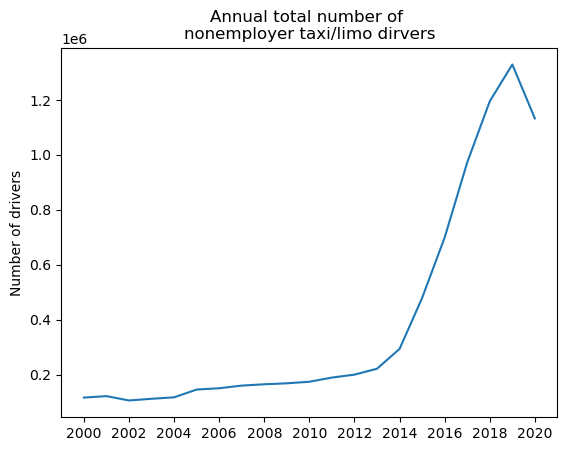

In [39]:
plt.plot(df_merged.groupby('YEAR').ESTAB.sum())
plt.ylabel('Number of drivers')
plt.title('Annual total number of \nnonemployer taxi/limo dirvers')
plt.xticks(range(2000,2021,2))  #find better way to set the axis to integers

AttributeError: module 'matplotlib.pyplot' has no attribute 'ticker'

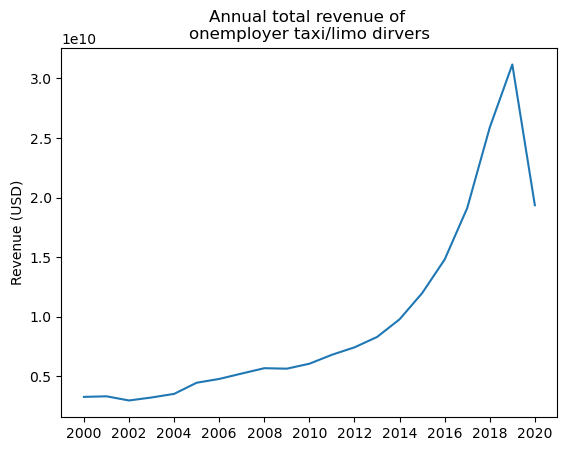

In [40]:
plt.plot(df_merged.groupby('YEAR').RCPTOT.sum())
plt.ylabel('Revenue (USD)')     #change untis to dollars 
plt.title('Annual total revenue of \nonemployer taxi/limo dirvers')
plt.xticks(range(2000,2021,2))  #find better way to set the axis to integers
plt.ticker.StrMethodFormatter("${x:,g}")

AttributeError: 'list' object has no attribute 'plt'

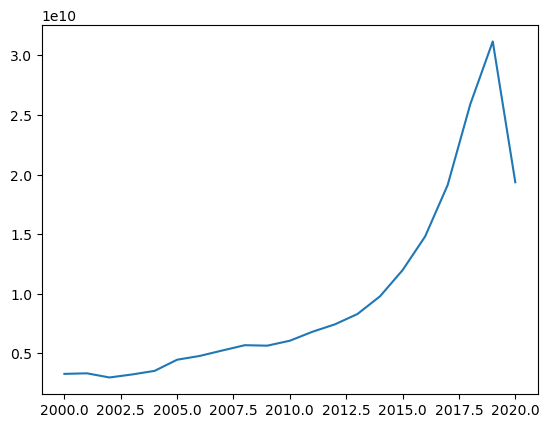

In [41]:
fig = plt.plot(df_merged.groupby('YEAR').RCPTOT.sum())
fig.plt.ylabel('Revenue (USD)')     #change untis to dollars 
#plt.title('Annual total revenue of \nonemployer taxi/limo dirvers')
#plt.xticks(range(2000,2021,2))  #find better way to set the axis to integers
#plt.ticker.StrMethodFormatter("${x:,g}")

### NA Analysis

Looking into NA/zero values 

Checking to see if all years record data from about the same number of counties. Number of counties is increasing a little but no major alarmnig year missing a ton of counties

In [115]:
print(len(df_2000))
print(len(df_2002))
print(len(df_2003))
print(len(df_2004))
print(len(df_2005))
print(len(df_2006))
print(len(df_2007))
print(len(df_2008))
print(len(df_2009))
print(len(df_2010))
print(len(df_2011))
print(len(df_2012))
print(len(df_2013))
print(len(df_2014))
print(len(df_2015))
print(len(df_2016))
print(len(df_2017))
print(len(df_2018))
print(len(df_2019))
print(len(df_2020))
#df_2020['FULL_FIPS'].unique()

1885
2006
1969
1925
1905
1913
2040
2052
2029
2026
2045
2115
2080
2119
2272
2422
2644
2279
2414
2358


Looks like years 2000 - 2004 have the most cases where # of establishments == 0, but 2008 - 2014 also have 1,000 counties without any establishments 

In [95]:
df_merged[df_merged['ESTAB'] == 0].groupby('YEAR').size()

YEAR
2000    1488
2001    1525
2002    1774
2003    1712
2004    1679
2005     802
2006     798
2007     929
2008    1042
2009    1021
2010    1033
2011    1057
2012    1079
2013    1060
2014    1037
2015     748
2016     678
2017     615
2018      29
2019      24
2020      36
dtype: int64

In [96]:
#checking that NY city counties are not coming in as zeros
df_merged[(df_merged['ESTAB'] == 0) & (df_merged['FULL_FIPS'] == '36005')]

,ST,CTY,FULL_FIPS,YEAR,ESTAB,RCPTOT


In [126]:
df_merged[(df_merged['FULL_FIPS'] == '11001')]

,ST,CTY,FULL_FIPS,YEAR,ESTAB,RCPTOT
100060,11,001,11001,2000,1051,18502
100302,11,001,11001,2001,985,17768
102168,11,001,11001,2002,937,18114
103440,11,001,11001,2003,865,17006
102532,11,001,11001,2004,912,17786
102482,11,001,11001,2005,1019,20025
103329,11,001,11001,2006,1025,21743
104768,11,001,11001,2007,1133,22986
104023,11,001,11001,2008,1155,25902
103640,11,001,11001,2009,1170,24955


In [97]:

df_merged[(df_merged['ESTAB'] == 0) & (df_merged['FULL_FIPS'] == '20159')]

,ST,CTY,FULL_FIPS,YEAR,ESTAB,RCPTOT
301331,20,159,20159,2015,0,0


Seems strange that one county would only show up in 2000 - 2004

In [101]:
df_merged[(df_merged['FULL_FIPS'] == '20081')]

,ST,CTY,FULL_FIPS,YEAR,ESTAB,RCPTOT
280887,20,081,20081,2000,0,0
281614,20,081,20081,2001,0,0
286036,20,081,20081,2002,0,0
287634,20,081,20081,2003,0,0
287220,20,081,20081,2004,0,0


In [116]:
df_merged[(df_merged['ST'] == '20') & (df_merged['CTY'] == '081')]

,ST,CTY,FULL_FIPS,YEAR,ESTAB,RCPTOT
280887,20,081,20081,2000,0,0
281614,20,081,20081,2001,0,0
286036,20,081,20081,2002,0,0
287634,20,081,20081,2003,0,0
287220,20,081,20081,2004,0,0


Issues with how kansas is coming in, only showing data for 2000 - 2004

In [120]:
df_merged[(df_merged['ST'] == '20') & (df_merged['YEAR'] == '2005')]

,ST,CTY,FULL_FIPS,YEAR,ESTAB,RCPTOT


In [125]:
df_fips_observations = df_merged.groupby('FULL_FIPS').size()
df_fips_observations

FULL_FIPS
01001    14
01003    21
01005     9
01007    11
01009     9
         ..
56035     8
56037    21
56039    21
56041    16
56043     2
Length: 2996, dtype: int64

### Code to create df for NAICS code 492 (Couriers)

In [42]:
df_courier_2000 = make_nes_df(2000, 492)
df_courier_2001 = make_nes_df(2001, 492)
df_courier_2002 = make_nes_df(2002, 492)
df_courier_2003 = make_nes_df(2003, 492)
df_courier_2004 = make_nes_df(2004, 492)
df_courier_2005 = make_nes_df(2005, 492)
df_courier_2006 = make_nes_df(2006, 492)
df_courier_2007 = make_nes_df(2007, 492)
df_courier_2008 = make_nes_df(2008, 492)
df_courier_2009 = make_nes_df(2009, 492)
df_courier_2010 = make_nes_df(2010, 492)
df_courier_2011 = make_nes_df(2011, 492)
df_courier_2012 = make_nes_df(2012, 492)
df_courier_2013 = make_nes_df(2013, 492)
df_courier_2014 = make_nes_df(2014, 492)
df_courier_2015 = make_nes_df(2015, 492)
df_courier_2016 = make_nes_df(2016, 492)
df_courier_2017 = make_nes_df(2017, 492)
df_courier_2018 = make_nes_df(2018, 492)
df_courier_2019 = make_nes_df(2019, 492)
df_courier_2020 = make_nes_df(2020, 492)

In [49]:
pdListCourier = [df_courier_2000, df_courier_2001, df_courier_2002, df_courier_2003, df_courier_2004,
                 df_courier_2005, df_courier_2006, df_courier_2007, df_courier_2008, df_courier_2009, 
                 df_courier_2010, df_courier_2011, df_courier_2012, df_courier_2013, df_courier_2014, 
                 df_courier_2015, df_courier_2016, df_courier_2017, df_courier_2018, df_courier_2019, df_courier_2020]  # List of dataframes
df_courier_merged = pd.concat(pdListCourier)

In [51]:
df_courier_merged = df_courier_merged[['ST', 'CTY', 'FULL_FIPS', 'YEAR','ESTAB_F', 'ESTAB', 'RCPTOT_F', 'RCPTOT']]

In [53]:
df_courier_merged.dtypes

ST           object
CTY          object
FULL_FIPS    object
YEAR          int64
ESTAB_F      object
ESTAB        object
RCPTOT_F     object
RCPTOT       object
dtype: object

In [54]:
df_courier_merged['ESTAB'] = pd.to_numeric(df_courier_merged['ESTAB'])
df_courier_merged['RCPTOT'] = pd.to_numeric(df_courier_merged['RCPTOT'])

C:\Users\hrowe\AppData\Local\Temp\ipykernel_31068\3311327183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_courier_merged['ESTAB'] = pd.to_numeric(df_courier_merged['ESTAB'])
C:\Users\hrowe\AppData\Local\Temp\ipykernel_31068\3311327183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_courier_merged['RCPTOT'] = pd.to_numeric(df_courier_merged['RCPTOT'])


In [55]:
df_courier_merged.dtypes

ST           object
CTY          object
FULL_FIPS    object
YEAR          int64
ESTAB_F      object
ESTAB         int64
RCPTOT_F     object
RCPTOT        int64
dtype: object

Receipt totals are given in thousands, adjusting the units here

In [56]:
df_courier_merged['RCPTOT'] = df_courier_merged['RCPTOT'] * 1000

C:\Users\hrowe\AppData\Local\Temp\ipykernel_31068\3316883783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_courier_merged['RCPTOT'] = df_courier_merged['RCPTOT'] * 1000


Making sure suppression flags are working as we would expect 

In [59]:
df_courier_merged[(df_courier_merged['ESTAB'] == 0) & (df_courier_merged['ESTAB_F'].isna()) ]  #expect a df with zero rows 

,ST,CTY,FULL_FIPS,YEAR,ESTAB_F,ESTAB,RCPTOT_F,RCPTOT


In [57]:
df_courier_merged

,ST,CTY,FULL_FIPS,YEAR,ESTAB_F,ESTAB,RCPTOT_F,RCPTOT
161,01,001,01001,2000,D,0,D,0
544,01,003,01003,2000,NaN,49,NaN,849000
1168,01,007,01007,2000,D,0,D,0
1464,01,009,01009,2000,D,0,D,0
1734,01,011,01011,2000,D,0,D,0
...,...,...,...,...,...,...,...,...
685649,56,037,56037,2020,NaN,48,NaN,609000
685891,56,039,56039,2020,NaN,21,NaN,271000
686145,56,041,56041,2020,NaN,9,NaN,319000
686321,56,043,56043,2020,NaN,5,NaN,95000


In [60]:
df_courier_merged.to_csv('NES_naics_492.csv')